In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.isna()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [4]:
 data = data.dropna()


In [5]:
# rows_with_nulls = data[data.isnull().any(axis=1)]
# print(rows_with_nulls)
data.isna().sum()

x    0
y    0
dtype: int64

In [6]:
train_input = np.array(data.x[0:500] ).reshape(500 , 1)
train_output = np.array(data.y[0:500] ).reshape(500 , 1)
test_input = np.array(data.x[500:700] ).reshape(199 , 1)
test_output = np.array(data.y[500:700] ).reshape(199 , 1)

# LINEAR REGRESSION

### FORWARD PROPAGATION

In [9]:
# y' = mx + c 
def forward_propagation(train_input , parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = m*train_input + c
    return predictions
    
    

### COST FUNCTION

In [11]:
# cost = summation (y' - y)^2 / 2n

def cost_function(train_output , predictions ):
    cost = np.mean((train_output - predictions )**2) *0.5
    return cost

### GRADIENT DESCENT OR BACK PROPAGATION

In [13]:

# df = summmation(y' - y ) /n
# dm = df*x
# dc = df*1

def back_propagation(train_output , predictions , train_input):
    derivatives  = dict()
    df = predictions - train_output
    dm = np.mean (np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm 
    derivatives["dc"] = dc
    return derivatives
    


### UPDATE PARAMETERS

In [15]:
# m = m - learning rate* dm
# c = c - learning rate* dc

def update_parameters(parameters , derivatives , learning_rate):
    parameters["m"] = parameters["m"]  - learning_rate* derivatives["dm"]
    parameters["c"] = parameters["c"]  - learning_rate* derivatives["dc"]

    return parameters
    
    

### MODEL TRAINING

In [17]:
def training(train_input , train_output , iters , learning_rate):
    parameters = dict()

    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    loss = []
    plt.figure()
    for i in range(iters):
        #forward propagation
        predictions = forward_propagation(train_input , parameters)
        #cost
        cost = cost_function(train_output , predictions)
        loss.append(cost)
        print("Iteration = " + str(i+1 ) +",lost = " + str(cost))


        fig , ax = plt.subplots()

        ax.plot(train_input , train_output , "+" , label = "original")
        ax.plot(train_input , predictions , "*" , label = "training")

        legend = ax.legend()
        plt.plot(train_input , train_output , "+" , label = "original")
        plt.plot(train_input , predictions , "*" , label = "training")
        plt.show()

        # back propagation
        derivatives = back_propagation(train_output , predictions , train_input)

        # updATE PARAmeters
        
        parameters =  update_parameters(parameters , derivatives , learning_rate)
    return parameters,loss


        

Iteration = 1,lost = 1309.3220098262434


<Figure size 640x480 with 0 Axes>

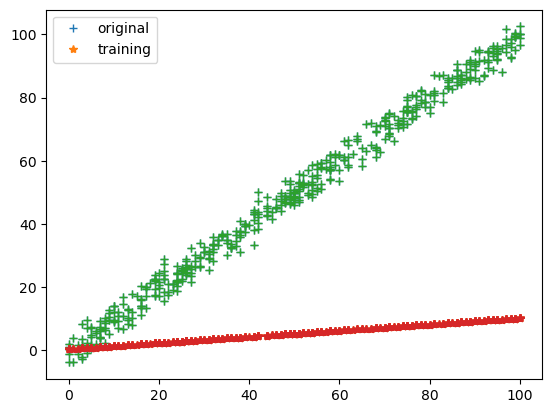

Iteration = 2,lost = 596.198446982519


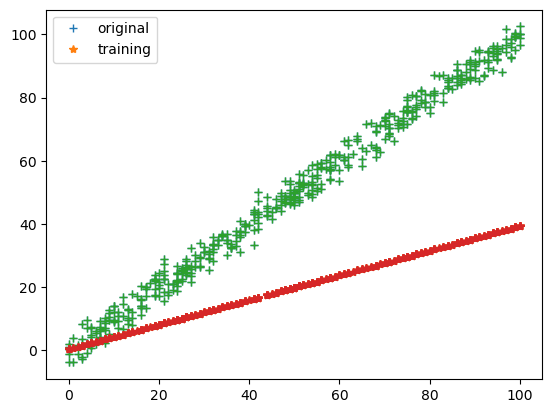

Iteration = 3,lost = 272.6534955585243


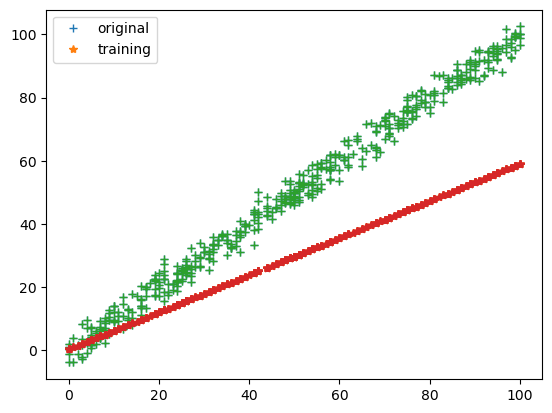

Iteration = 4,lost = 125.86079164904143


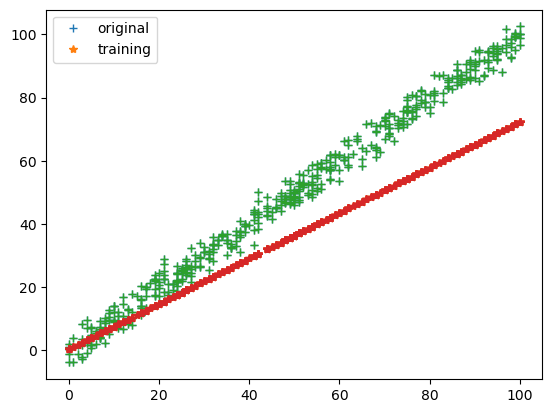

Iteration = 5,lost = 59.26077821502089


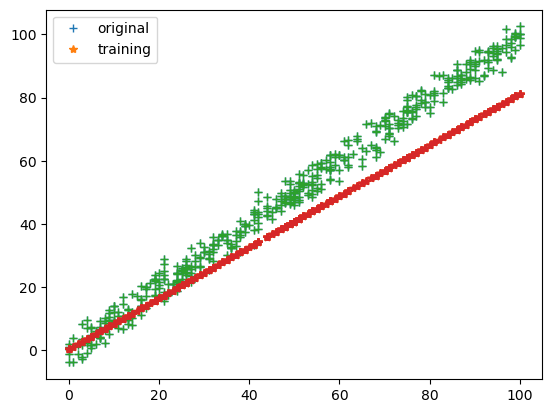

Iteration = 6,lost = 29.044277274500935


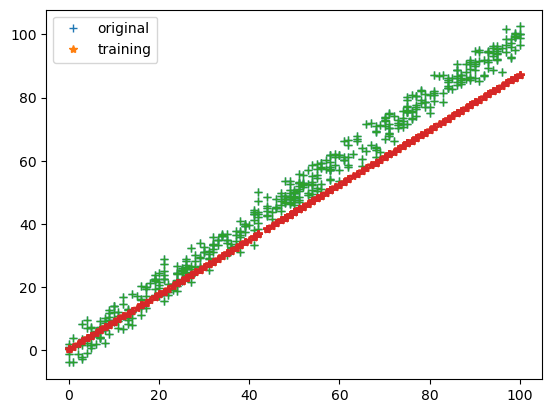

Iteration = 7,lost = 15.335016252214322


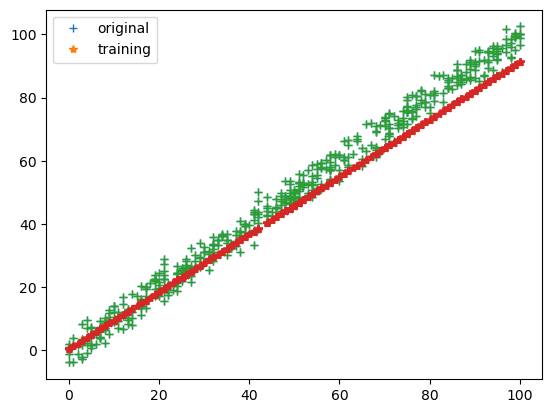

Iteration = 8,lost = 9.115108264983707


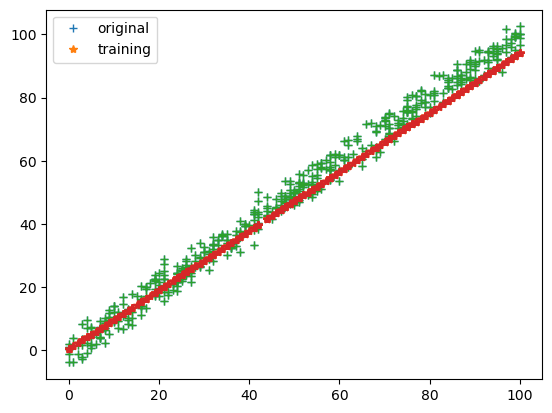

Iteration = 9,lost = 6.29312804532829


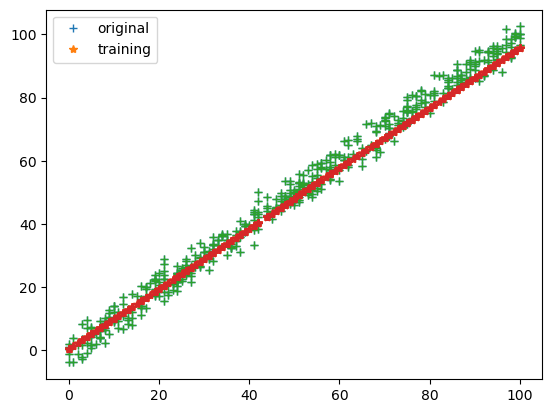

Iteration = 10,lost = 5.012791417560831


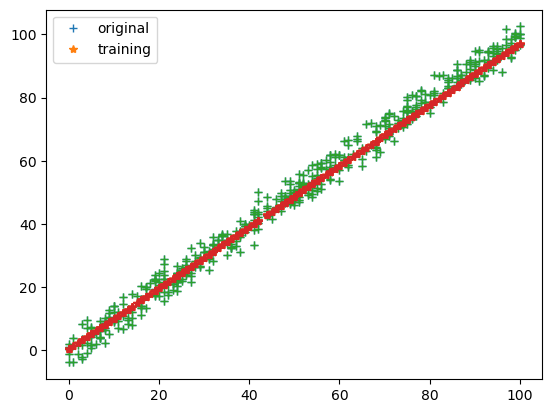

Iteration = 11,lost = 4.431900195075113


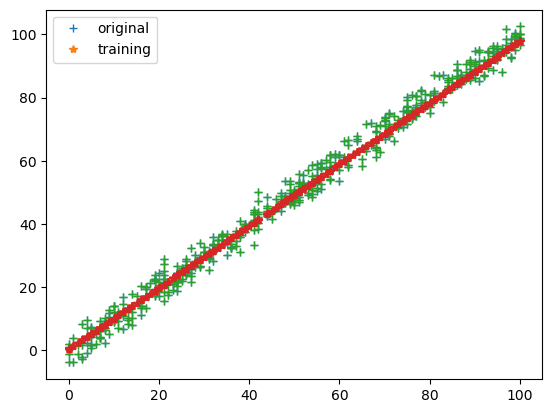

Iteration = 12,lost = 4.168348127754504


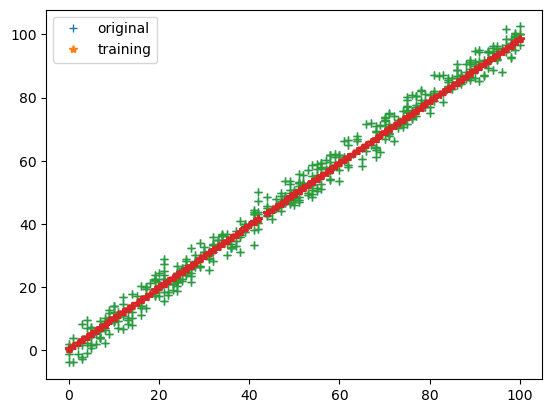

Iteration = 13,lost = 4.048773186684442


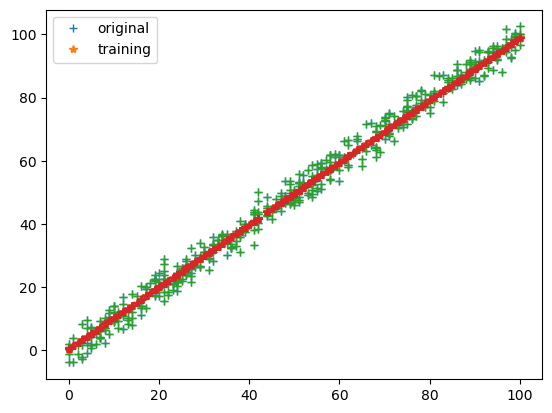

Iteration = 14,lost = 3.9945208273234702


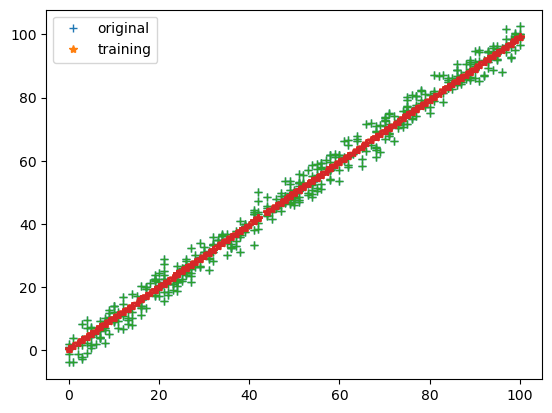

Iteration = 15,lost = 3.9699053956921015


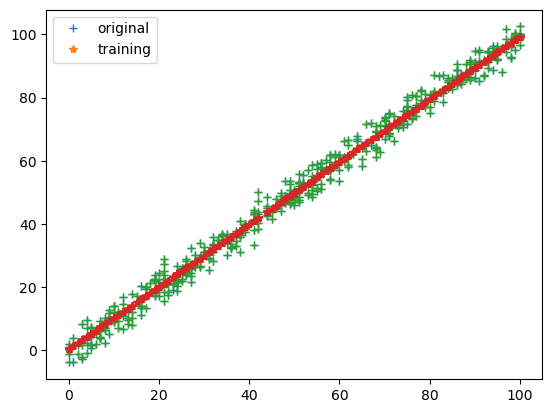

Iteration = 16,lost = 3.9587362710529437


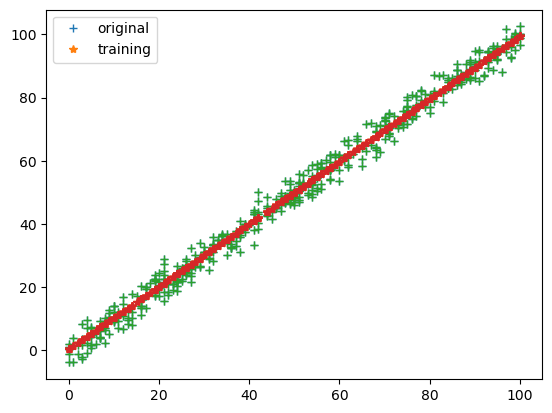

Iteration = 17,lost = 3.953667750844041


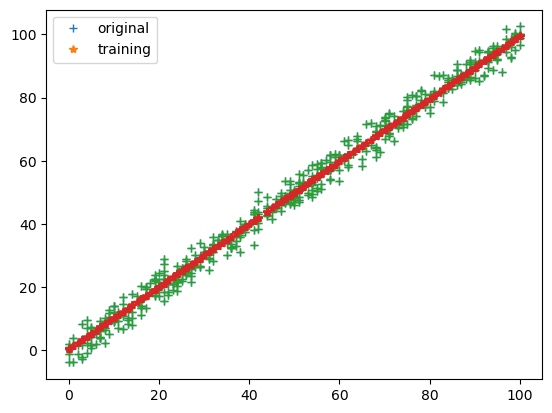

Iteration = 18,lost = 3.9513670816766253


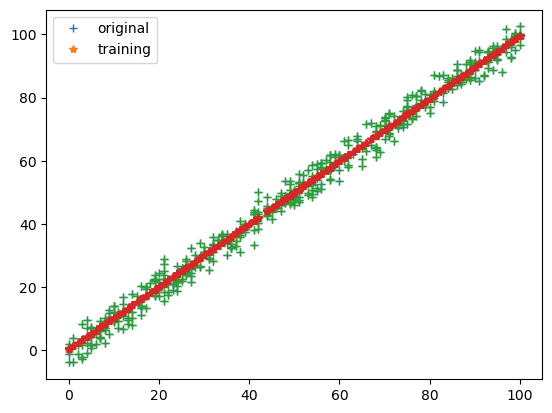

Iteration = 19,lost = 3.950322189646718


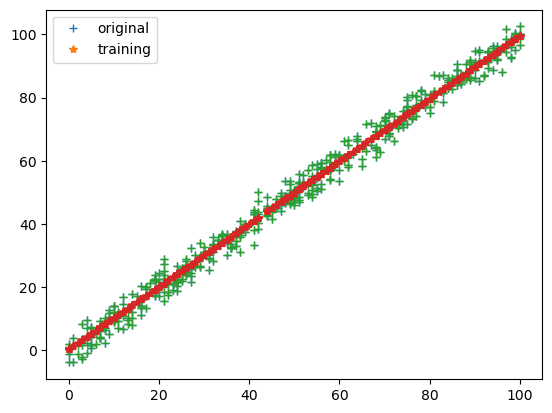

Iteration = 20,lost = 3.9498470451492445


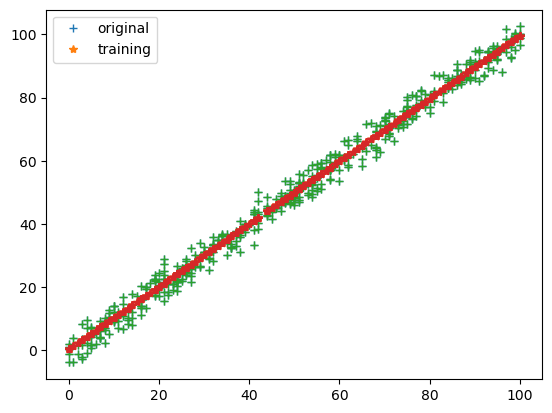

In [18]:
parameters,loss = training(train_input , train_output , 20 , 0.0001 )

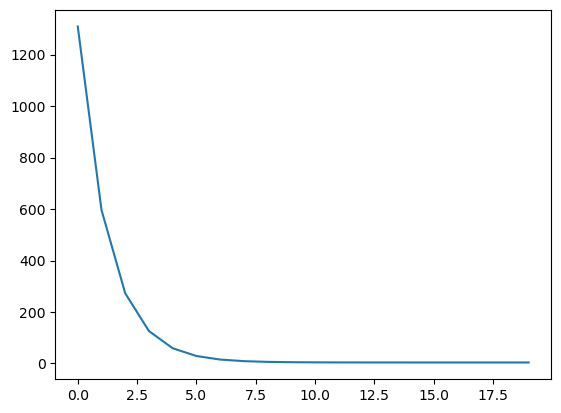

In [33]:
plt.plot(loss)

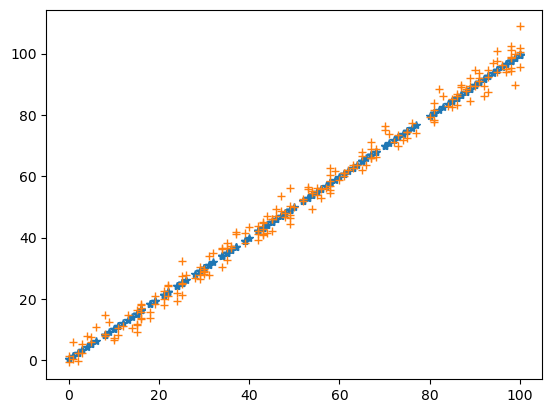

In [39]:
predictions = parameters["m"] * test_input + parameters["c"]
plt.plot(test_input , predictions , "*")
plt.plot(test_input , test_output,"+")
plt.show()